In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score,log_loss, confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.utils import class_weight
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics

In [ ]:
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from mlxtend.classifier import StackingClassifier
from imblearn.pipeline import Pipeline as imbpipeline, make_pipeline 

In [ ]:
!pip install pipeline 
!pip install classifier
!pip install over

In [ ]:
df = pd.read_csv(r'C:\Users\hocin\Desktop\projet 1 csv\dataset_1_Bank_Loan.csv')
df

FileNotFoundError: ignored

In [ ]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.sample(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24109,21cf076e-b0e9-45b3-b42e-9708547cf17b,4f8646bb-50d7-414d-82d0-6ed8b8bc10ba,Fully Paid,335676.0,Short Term,691.0,966340.0,1 year,Rent,Debt Consolidation,22225.82,12.0,40.0,8.0,0.0,216543.0,273130.0,0.0,0.0
80527,7f23ec76-f208-4f44-a523-34fe28180287,631a6ac0-49c1-432b-81aa-e71afca991ef,Fully Paid,337964.0,Short Term,711.0,1050719.0,3 years,Rent,Other,19876.28,32.0,52.0,9.0,1.0,104576.0,326348.0,1.0,0.0
91261,b2841a38-9600-4d32-8291-f7e783643e3f,103614a0-b557-4ec1-91ae-f912fc75de7c,Fully Paid,67408.0,Short Term,728.0,659699.0,3 years,Rent,Debt Consolidation,4288.11,15.0,NaN,5.0,0.0,14288.0,35948.0,0.0,0.0
57135,a1fb0eed-7b9c-4013-9145-186d5c81eaa5,7bc38576-239c-4dca-ad74-2c6221419729,Fully Paid,99999999.0,Short Term,724.0,1202263.0,7 years,Own Home,Buy a Car,8065.31,18.5,23.0,4.0,0.0,8721.0,38126.0,0.0,0.0
74339,afcbbd44-f771-4bd2-a3fb-edbd2121a3a0,c798728f-da65-46f2-9f68-16ce1e3449ef,Fully Paid,361350.0,Short Term,716.0,2284028.0,2 years,Rent,other,20556.29,21.1,6.0,7.0,0.0,123690.0,305382.0,0.0,0.0
51195,89d1c68e-4a79-4a3b-97c8-4329f360a11c,65a8beb1-74e7-45ad-914e-d8dc54b27525,Fully Paid,234256.0,Short Term,701.0,867065.0,7 years,Rent,other,12644.50,11.0,69.0,10.0,0.0,157206.0,323312.0,0.0,0.0
86460,bddf9008-4f08-4c0c-ab97-7413037641a7,56bee86a-5136-4704-aa19-7aadb1cb18f3,Charged Off,776864.0,Short Term,722.0,1686877.0,4 years,Home Mortgage,Home Improvements,12412.51,13.0,35.0,11.0,0.0,149910.0,545820.0,0.0,0.0
325,c9eeb38d-03fc-4a5f-bcf8-753dd041ec71,445a6146-6b1f-47c1-8550-cf396f30d24b,Fully Paid,764390.0,Long Term,705.0,1603220.0,2 years,Home Mortgage,Debt Consolidation,34869.75,30.6,50.0,15.0,0.0,425448.0,1089902.0,0.0,0.0
37953,8be44892-0063-4e49-94c0-331ba1890acd,01de267e-0a82-491c-a57a-1ab9bf216059,Charged Off,674454.0,Long Term,7190.0,2025020.0,6 years,Home Mortgage,Debt Consolidation,25650.19,20.3,NaN,8.0,0.0,700606.0,1000274.0,0.0,0.0


In [ ]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
len(df)

100514

In [ ]:
df['Months since last delinquent'].isnull().sum()

53655

In [ ]:
df[df['Months since last delinquent'] ==0]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
125,6bba193a-7546-4996-ac3c-6e6ae565326d,044bdda9-adf7-4025-b77d-0160e4e834c2,Charged Off,446094.0,Short Term,NaN,NaN,3 years,Home Mortgage,Debt Consolidation,30975.51,7.0,0.0,9.0,0.0,76.0,85998.0,0.0,0.0
1699,80530120-aee3-48d4-97b7-f6c74c60da73,dfe87834-58da-4fd1-a688-16b7b5c1b8d9,Charged Off,324830.0,Short Term,717.0,709916.0,8 years,Rent,Debt Consolidation,12955.91,13.8,0.0,14.0,0.0,280421.0,753346.0,NaN,0.0
1929,2521accb-8c92-4891-b382-4af663ae647e,c02351cb-9530-4340-b05f-8621040428f9,Fully Paid,99616.0,Short Term,741.0,1926467.0,4 years,Home Mortgage,Debt Consolidation,10964.71,22.0,0.0,6.0,0.0,22515.0,30316.0,0.0,0.0
2317,a0c67880-b55a-44a0-842c-c2a7ba974c3b,0d365a60-03dc-4faa-b9be-b6161a2f6cee,Fully Paid,331628.0,Short Term,692.0,972268.0,10+ years,Home Mortgage,Debt Consolidation,19850.63,25.8,0.0,17.0,0.0,50939.0,746570.0,0.0,0.0
3462,0b525b55-c30f-4daf-a991-57242a469b24,aaefe04b-80a4-4f22-aaf4-49881302a950,Fully Paid,67166.0,Short Term,741.0,707579.0,4 years,Rent,other,1586.31,21.5,0.0,4.0,0.0,28842.0,100606.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97469,89f8b9b1-823a-4a52-a6b2-cfddcfaac994,f9cbcd1d-0f8a-423e-9607-af8f3fb3d2a7,Fully Paid,196174.0,Short Term,712.0,1600142.0,6 years,Home Mortgage,Debt Consolidation,29069.24,22.5,0.0,15.0,0.0,257640.0,612568.0,NaN,0.0
97688,305b5548-f00a-48e9-9981-b3edd3a1a9c5,3ce674c9-73b0-42c0-8077-cdb84546bcba,Charged Off,109318.0,Short Term,712.0,2321648.0,9 years,Rent,Debt Consolidation,30955.18,9.0,0.0,18.0,1.0,40622.0,288618.0,0.0,1.0
99283,65edac75-2eb5-4d98-a205-c2bd8b7524fe,bc2f71c0-e9fa-485e-bfe5-1107c6bdaadd,Fully Paid,131538.0,Short Term,747.0,1912293.0,10+ years,Home Mortgage,Debt Consolidation,49400.76,26.9,0.0,24.0,0.0,258153.0,1299672.0,0.0,0.0
99407,e13004e1-01ef-4601-936e-868e130b0d64,98111ee6-68f9-4500-9241-71f4b89fe607,Charged Off,450428.0,Short Term,718.0,1867225.0,< 1 year,Home Mortgage,small_business,27697.25,18.6,0.0,5.0,0.0,1805.0,0.0,NaN,0.0


In [ ]:
len(df[df['Months since last delinquent'] ==0])

216

In [ ]:

df.isnull().mean()*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                     0.000000
Annual Income                    0.000000
Years in current job             4.220370
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    52.783069
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.001237
Bankruptcies                     0.200381
Tax Liens                        0.007422
dtype: float64

In [ ]:
Months since last delinquent    53.380624

In [ ]:
# On remarque que cette plus 50% sont des null

In [ ]:
# les revenu annuel 19% sont null 
df = df.dropna(subset = ['Annual Income'])

In [ ]:
df.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House',
       'Business Loan', 'other', 'major_purchase', 'Take a Trip', 'Other',
       'Buy a Car', 'small_business', 'Medical Bills', 'wedding',
       'vacation', 'Educational Expenses', 'moving', 'renewable_energy'],
      dtype=object)

In [ ]:
df.Purpose.value_counts()

Debt Consolidation      63314
other                    5017
Home Improvements        4720
Other                    2642
Business Loan            1275
Buy a Car                1024
Medical Bills             921
Buy House                 565
Take a Trip               476
major_purchase            282
small_business            234
moving                    125
wedding                    88
Educational Expenses       82
vacation                   73
renewable_energy            8
Name: Purpose, dtype: int64

In [ ]:


# other ci repeté en eux fois 
df.Purpose = df.Purpose.str.replace('other','Other')

In [ ]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             3412
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    42673
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      162
Tax Liens                           6
dtype: int64

In [ ]:
df.shape[0],df.shape[1]


(80846, 19)

In [ ]:


df.tail()



,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
df = df.dropna(subset = ['Annual Income'])

In [ ]:
df.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             3412
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    42673
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      162
Tax Liens                           6
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80846 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       80846 non-null  object 
 1   Customer ID                   80846 non-null  object 
 2   Loan Status                   80846 non-null  object 
 3   Current Loan Amount           80846 non-null  float64
 4   Term                          80846 non-null  object 
 5   Credit Score                  80846 non-null  float64
 6   Annual Income                 80846 non-null  float64
 7   Years in current job          77434 non-null  object 
 8   Home Ownership                80846 non-null  object 
 9   Purpose                       80846 non-null  object 
 10  Monthly Debt                  80846 non-null  float64
 11  Years of Credit History       80846 non-null  float64
 12  Months since last delinquent  38173 non-null  float64
 13  N

In [ ]:
doublon = df.duplicated()
doublon.sum()

10215

In [ ]:
df.shape

(100514, 19)

In [ ]:
df= df.reset_index(drop=True)
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80841,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
df.columns = df.columns.str.replace(' ','_')
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80841,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
#  comme sur la  colome  id de pret y'des nul donc on doit les  suprime ces nul 
df = df.dropna(subset = ['Loan_ID'])
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80841,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
df.shape

(80846, 19)

In [ ]:
df.sample(15)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
28562,0b64379d-6c8a-4408-a5e5-08d96642f524,fd13a314-491b-46a7-9763-014a79e1e7f5,Fully Paid,729168.0,Long Term,708.0,3526476.0,3 years,Rent,Debt Consolidation,49958.22,18.0,NaN,21.0,0.0,703988.0,1523654.0,0.0,0.0
53242,8ab8ca28-a048-4369-8305-5a074f10cf33,0e0d7f95-8337-4064-bfc2-f8fbbaab6ee4,Fully Paid,217514.0,Short Term,738.0,1352534.0,8 years,Rent,Buy a Car,755.25,13.9,23.0,6.0,0.0,24871.0,219846.0,0.0,0.0
59806,425ce238-fa9e-41ff-9fe1-99f57b140bab,0e51b8b8-d4c9-43c1-93eb-396a1115eefb,Fully Paid,568194.0,Short Term,750.0,2531503.0,8 years,Home Mortgage,Debt Consolidation,25315.03,16.6,NaN,17.0,0.0,583034.0,1496858.0,0.0,0.0
27638,33a49030-ae41-472b-8aef-c7ce924bbed5,43156caf-e3ee-4ca1-9899-50314a50ff0e,Charged Off,196592.0,Short Term,746.0,1131906.0,10+ years,Own Home,Debt Consolidation,5036.90,29.5,27.0,10.0,0.0,164939.0,612106.0,0.0,0.0
1275,3877e759-c486-474b-96f1-2314617ee2f3,80f1cdaf-3225-4f44-8b1c-f88bbcae57c5,Fully Paid,206690.0,Short Term,655.0,1499176.0,4 years,Home Mortgage,Debt Consolidation,22737.49,15.7,13.0,10.0,1.0,65683.0,140844.0,0.0,1.0
25931,da9db766-e482-43e4-92eb-a9c1976c5d81,59c3f469-34c1-4cd7-bc79-13de6542d5b1,Fully Paid,134024.0,Short Term,713.0,694526.0,< 1 year,Home Mortgage,Debt Consolidation,12848.94,17.0,49.0,11.0,0.0,163761.0,274780.0,0.0,0.0
12439,c85a7f99-4cb6-4948-84df-956ac9d3c2b4,1ee8145b-cbee-4e21-af5b-4c56d7c47c4c,Fully Paid,432960.0,Short Term,734.0,836114.0,2 years,Home Mortgage,Debt Consolidation,11635.79,12.0,NaN,7.0,0.0,279509.0,430364.0,0.0,0.0
5683,458c4207-fb1c-48b5-8a2f-32df39b35717,04427fb8-83c6-4f88-93ae-b5ab0c18be56,Fully Paid,99999999.0,Short Term,749.0,1302602.0,6 years,Home Mortgage,Debt Consolidation,10713.91,13.0,NaN,11.0,0.0,303164.0,651266.0,0.0,0.0
60503,e714e982-b374-4789-a093-b2891db1915a,d5f0252a-cb47-4adf-b90a-276584451811,Fully Paid,215820.0,Short Term,723.0,876033.0,9 years,Home Mortgage,Debt Consolidation,5555.60,15.4,50.0,17.0,1.0,118123.0,446952.0,1.0,0.0
63017,d83e69c7-5aa6-4a3d-8679-22b54039f84a,c27c7c73-e4fc-4dda-9379-7c92452ba276,Fully Paid,224664.0,Long Term,729.0,1552224.0,3 years,Home Mortgage,Debt Consolidation,24965.05,22.2,23.0,11.0,0.0,184167.0,312246.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80846 entries, 0 to 80845
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       80846 non-null  object 
 1   Customer_ID                   80846 non-null  object 
 2   Loan_Status                   80846 non-null  object 
 3   Current_Loan_Amount           80846 non-null  float64
 4   Term                          80846 non-null  object 
 5   Credit_Score                  80846 non-null  float64
 6   Annual_Income                 80846 non-null  float64
 7   Years_in_current_job          77434 non-null  object 
 8   Home_Ownership                80846 non-null  object 
 9   Purpose                       80846 non-null  object 
 10  Monthly_Debt                  80846 non-null  float64
 11  Years_of_Credit_History       80846 non-null  float64
 12  Months_since_last_delinquent  38173 non-null  float64
 13  N

In [ ]:
df.isna().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             3412
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    42673
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      162
Tax_Liens                           6
dtype: int64

In [ ]:
# verifier les doublon et les suprime les ligne 
doublon = df.duplicated()
doublon.sum()
df.drop_duplicates(inplace=True)


In [ ]:
# verification doublon apres suprusion  = 0 
df1.duplicated().sum()

10728

In [ ]:
# les doublon sur la colone loan_id 


df1['Loan_ID'].value_counts().sort_values(ascending=False)


6db331e3-b3d8-44f2-880e-1f103afa29de    2
9f171292-090f-4b20-adf7-224bf500242a    2
5dfa3368-6336-4156-9532-879c8c209a34    2
ffcdb42b-44ad-4592-a7b2-727a6c336492    2
8a71ee5a-04ae-41b9-9b47-6efc7bce304d    2
                                       ..
07b25f49-02aa-49c9-b975-eb910d354cdb    1
39fb471e-91b8-4bbe-92a3-0611d5807d03    1
18d882f1-03f6-4f83-a251-6afa7cbc51c0    1
1e03733c-5b13-4afa-b92d-7990fd45d8d8    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: Loan_ID, Length: 67052, dtype: int64

In [ ]:
df[df.Loan_ID.duplicated()].sort_values(ascending=False)

NameError: ignored

In [ ]:


df1[df1['Loan_ID'] == '8506a4e9-af7d-47d2-a1bf-7ea2c41858f0']



,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
80840,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0


In [ ]:
df[df['Loan_ID'].duplicated()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
770,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
2160,6b9fdc83-4696-479c-8ab1-cc35e2233cd8,4bfbef83-43cb-4f97-83d8-b8fe05fd4a57,Fully Paid,99999999.0,Long Term,700.0,686945.0,1 year,Own Home,Debt Consolidation,3932.81,11.0,NaN,7.0,0.0,164578.0,227678.0,0.0,0.0
2284,412394d9-b450-42dc-9b2f-3956948df8b6,1dc24b5e-f322-469b-a154-a15fea750baf,Fully Paid,99999999.0,Short Term,707.0,1118948.0,10+ years,Rent,Debt Consolidation,29465.58,15.7,63.0,11.0,1.0,66994.0,129294.0,1.0,0.0
2367,dde6e377-f8ae-454c-b7a6-7e6aab1bb1b8,963fa0d0-37aa-4b6a-8842-2ee56eb30618,Fully Paid,99999999.0,Long Term,654.0,1155618.0,6 years,Rent,Debt Consolidation,23979.14,11.3,4.0,13.0,0.0,315210.0,619674.0,0.0,0.0
2437,54417e35-2e25-4aea-b83a-d52a060b1398,6201f781-d2a6-4bbf-8f5b-afa83c412559,Fully Paid,99999999.0,Short Term,715.0,930905.0,6 years,Home Mortgage,Debt Consolidation,26143.05,20.8,76.0,16.0,1.0,265772.0,575212.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80823,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,Fully Paid,99999999.0,Short Term,674.0,1058376.0,< 1 year,Home Mortgage,Other,11554.09,10.1,20.0,12.0,0.0,14098.0,333300.0,0.0,0.0
80824,fa1a1ef5-3697-469c-a842-538b8dcfb63a,567c8737-56d2-4aa8-b6a2-c55182f28518,Fully Paid,99999999.0,Long Term,616.0,1530564.0,8 years,Rent,Medical Bills,13264.85,28.0,3.0,10.0,0.0,111283.0,162910.0,0.0,0.0
80825,66a1c384-c294-4612-9705-d79aa95cf6bd,aa7f092f-d864-488a-95e5-32a6335b482a,Fully Paid,328350.0,Long Term,704.0,2041740.0,5 years,Rent,Other,32684.94,16.7,NaN,9.0,0.0,120612.0,234322.0,0.0,0.0
80829,2e7e2e3b-db0b-418d-aae8-33991bb2a503,52aa2f3b-3385-42fe-8aaa-57abace6d762,Fully Paid,766392.0,Short Term,717.0,1891070.0,7 years,Home Mortgage,Debt Consolidation,41130.82,15.4,NaN,20.0,1.0,604485.0,969430.0,1.0,0.0


In [ ]:
df[df['Current_Loan_Amount'] == 99999999.0]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
7,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
8,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
9,01d878ae-efa2-41e2-8159-6c834ff09f47,900c9191-2c20-4688-af7e-07c59b5d5a24,Fully Paid,99999999.0,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,NaN,10.0,1.0,225549.0,496474.0,1.0,0.0
19,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,Fully Paid,99999999.0,Short Term,724.0,1029857.0,1 year,Rent,Debt Consolidation,13817.18,12.0,NaN,6.0,0.0,138339.0,221232.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80790,fe3ae549-f563-4bed-aba5-6100bb7eccef,544e375d-9152-45ad-bee6-8fa7fd5bd383,Fully Paid,99999999.0,Short Term,746.0,3553323.0,10+ years,Home Mortgage,Business Loan,29225.99,16.6,NaN,14.0,0.0,988874.0,2400442.0,0.0,0.0
80810,7a863e10-f7b3-4674-afd6-832e06aa1e10,9016d95c-cf74-475e-9c39-c3fc97c8a164,Fully Paid,99999999.0,Long Term,735.0,1111918.0,5 years,Own Home,Debt Consolidation,20755.79,29.5,NaN,18.0,0.0,302290.0,1054284.0,0.0,0.0
80837,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,Other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [ ]:
# les doublon id de pret  et le montant de pret est incorrect 
df = df[~(df.Loan_ID.duplicated() & (df['Current_Loan_Amount'] == 99999999.0))]
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80840,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


# affiche les doublon de la colone loan id 

In [ ]:
df[(df.Loan_ID.duplicated())]
df 


,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80840,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:


df[df['Loan_ID'] == '8506a4e9-af7d-47d2-a1bf-7ea2c41858f0']



,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
80840,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0


In [ ]:
# suprime les null de la colonne Loan_Status Annual_Income 	
df['Loan_Status'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
80840    False
80842    False
80843    False
80844    False
80845    False
Name: Loan_Status, Length: 68835, dtype: bool

In [ ]:
df['Annual_Income'].isna()

NameError: ignored

In [ ]:
df = df.dropna(subset = ['Annual_Income'])


In [ ]:
# les valeur unique de la colonne objectif 
df.Purpose.unique() 

array(['Home Improvements', 'Debt Consolidation', 'Buy House',
       'Business Loan', 'Other', 'major_purchase', 'Take a Trip',
       'Buy a Car', 'small_business', 'Medical Bills', 'wedding',
       'vacation', 'Educational Expenses', 'moving', 'renewable_energy'],
      dtype=object)

In [ ]:
# on compte les valeurs unique 
df.Purpose.value_counts()

Debt Consolidation      54244
Other                    6264
Home Improvements        4029
Business Loan            1041
Buy a Car                 905
Medical Bills             749
Buy House                 451
Take a Trip               379
major_purchase            253
small_business            202
moving                    104
wedding                    75
Educational Expenses       74
vacation                   59
renewable_energy            6
Name: Purpose, dtype: int64

In [ ]:
# on remarque que Other et other avec O majuscule 
df.Purpose = df1.Purpose.str.replace('other','Other') 


In [ ]:
df1.Purpose.value_counts()

Debt Consolidation      55596
Other                    6489
Home Improvements        4118
Business Loan            1072
Buy a Car                 924
Medical Bills             777
Buy House                 469
Take a Trip               391
major_purchase            260
small_business            206
moving                    110
wedding                    78
Educational Expenses       74
vacation                   61
renewable_energy            6
Name: Purpose, dtype: int64

In [ ]:
df= df.drop_duplicates(subset = ['Loan_ID'])
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80840,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
df.isnull().sum() 

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2856
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    36132
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      140
Tax_Liens                           5
dtype: int64

In [ ]:
df.isnull().sum() 

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2856
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    36132
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      140
Tax_Liens                           5
dtype: int64

In [ ]:


plt.figure(figsize=(10,5))
sns.countplot(df1['Years_in_current_job'], palette='pink_r');



KeyError: 'Years_in_current_job'

<Figure size 720x360 with 0 Axes>

In [ ]:
df['Years_in_current_job'] = df['Years_in_current_job'].fillna('10+ years') # remplace les nul par la methode fillna

In [ ]:
df.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job                0
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    36132
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      140
Tax_Liens                           5
dtype: int64

In [ ]:
df = df.drop(columns='Months_since_last_delinquent')

In [ ]:
df.isnull().sum()

Loan_ID                        0
Customer_ID                    0
Loan_Status                    0
Current_Loan_Amount            0
Term                           0
Credit_Score                   0
Annual_Income                  0
Years_in_current_job           0
Home_Ownership                 0
Purpose                        0
Monthly_Debt                   0
Years_of_Credit_History        0
Number_of_Open_Accounts        0
Number_of_Credit_Problems      0
Current_Credit_Balance         0
Maximum_Open_Credit            1
Bankruptcies                 140
Tax_Liens                      5
dtype: int64

In [ ]:
df = df.dropna()
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80840,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
80842,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
80843,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
80844,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
df1.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [ ]:
df.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.107917,0.017428,-0.010117,0.027293,0.001534,-0.006181,0.004759,-0.000018,-0.001943,-0.004919
Credit_Score,-0.107917,1.000000,-0.017651,0.001349,-0.014165,0.007767,0.000493,0.000914,-0.003760,-0.004531,0.007395
Annual_Income,0.017428,-0.017651,1.000000,0.467553,0.152879,0.140281,-0.015224,0.296996,0.045879,-0.046311,0.041220
Monthly_Debt,-0.010117,0.001349,0.467553,1.000000,0.193980,0.408293,-0.052039,0.476068,0.047021,-0.077039,0.021927
Years_of_Credit_History,0.027293,-0.014165,0.152879,0.193980,1.000000,0.130662,0.060038,0.203522,0.031963,0.062628,0.019195
Number_of_Open_Accounts,0.001534,0.007767,0.140281,0.408293,0.130662,1.000000,-0.014265,0.226766,0.036049,-0.025148,0.007222
Number_of_Credit_Problems,-0.006181,0.000493,-0.015224,-0.052039,0.060038,-0.014265,1.000000,-0.106696,-0.012401,0.751233,0.588631
Current_Credit_Balance,0.004759,0.000914,0.296996,0.476068,0.203522,0.226766,-0.106696,1.000000,0.150623,-0.119390,-0.012033
Maximum_Open_Credit,-0.000018,-0.003760,0.045879,0.047021,0.031963,0.036049,-0.012401,0.150623,1.000000,-0.015864,-0.001171
Bankruptcies,-0.001943,-0.004531,-0.046311,-0.077039,0.062628,-0.025148,0.751233,-0.119390,-0.015864,1.000000,0.045717


In [ ]:
# remplacer les nan de la colone Années d'expérience dans le métier actuel 
df['Years_in_current_job'] = df['Years_in_current_job'].fillna('10+ years')
df['Years_in_current_job'] 

0          8 years
1          8 years
2          3 years
3        10+ years
4         < 1 year
           ...    
80840       1 year
80842       1 year
80843      6 years
80844      9 years
80845    10+ years
Name: Years_in_current_job, Length: 66911, dtype: object

In [ ]:
# annalyse le statut de pret par rapport au but 

statut_pret_but  = pd.crosstab(df['Purpose'], df['Loan_Status'],margins = False)
statut_pret_but 

Loan_Status,Charged Off,Fully Paid
Purpose,,
Business Loan,360,652
Buy House,111,330
Buy a Car,159,719
Debt Consolidation,13573,39222
Educational Expenses,12,52
Home Improvements,892,3030
Medical Bills,211,512
Other,1547,4498
Take a Trip,86,279


In [ ]:
df1.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66911 entries, 0 to 80845
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    66911 non-null  object 
 1   Customer_ID                66911 non-null  object 
 2   Loan_Status                66911 non-null  object 
 3   Current_Loan_Amount        66911 non-null  float64
 4   Term                       66911 non-null  object 
 5   Credit_Score               66911 non-null  float64
 6   Annual_Income              66911 non-null  float64
 7   Years_in_current_job       66911 non-null  object 
 8   Home_Ownership             66911 non-null  object 
 9   Purpose                    66911 non-null  object 
 10  Monthly_Debt               66911 non-null  float64
 11  Years_of_Credit_History    66911 non-null  float64
 12  Number_of_Open_Accounts    66911 non-null  float64
 13  Number_of_Credit_Problems  66911 non-null  flo

In [ ]:
df1.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


In [ ]:


plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [ ]:

data_corr = df1.corr()

In [ ]:
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

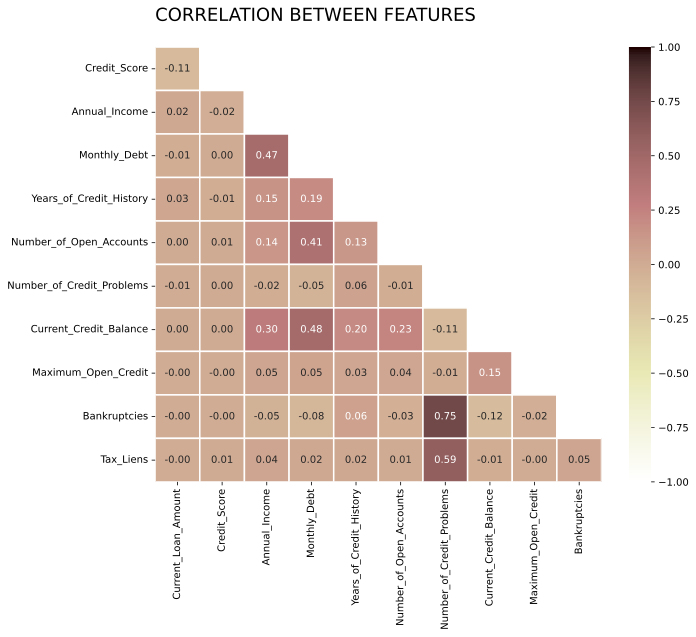

In [ ]:
plt.figure(figsize=(10,8))

# corr
data_corr = df.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

In [ ]:


c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});





NameError: name 'bank_lone_train' is not defined

<Figure size 504x504 with 0 Axes>

In [ ]:

Bank Loan Term Prediction
Import packages & read data.

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score,log_loss, confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
import imblearn.over_sampling
from sklearn.svm import SVC  
from sklearn.utils import class_weight
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline, make_pipeline 
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics

df = pd.read_csv('../input/my-dataset/credit_train.csv')
df

	Loan ID 	Customer ID 	Loan Status 	Current Loan Amount 	Term 	Credit Score 	Annual Income 	Years in current job 	Home Ownership 	Purpose 	Monthly Debt 	Years of Credit History 	Months since last delinquent 	Number of Open Accounts 	Number of Credit Problems 	Current Credit Balance 	Maximum Open Credit 	Bankruptcies 	Tax Liens
0 	14dd8831-6af5-400b-83ec-68e61888a048 	981165ec-3274-42f5-a3b4-d104041a9ca9 	Fully Paid 	445412.0 	Short Term 	709.0 	1167493.0 	8 years 	Home Mortgage 	Home Improvements 	5214.74 	17.2 	NaN 	6.0 	1.0 	228190.0 	416746.0 	1.0 	0.0
1 	4771cc26-131a-45db-b5aa-537ea4ba5342 	2de017a3-2e01-49cb-a581-08169e83be29 	Fully Paid 	262328.0 	Short Term 	NaN 	NaN 	10+ years 	Home Mortgage 	Debt Consolidation 	33295.98 	21.1 	8.0 	35.0 	0.0 	229976.0 	850784.0 	0.0 	0.0
2 	4eed4e6a-aa2f-4c91-8651-ce984ee8fb26 	5efb2b2b-bf11-4dfd-a572-3761a2694725 	Fully Paid 	99999999.0 	Short Term 	741.0 	2231892.0 	8 years 	Own Home 	Debt Consolidation 	29200.53 	14.9 	29.0 	18.0 	1.0 	297996.0 	750090.0 	0.0 	0.0
3 	77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a 	e777faab-98ae-45af-9a86-7ce5b33b1011 	Fully Paid 	347666.0 	Long Term 	721.0 	806949.0 	3 years 	Own Home 	Debt Consolidation 	8741.90 	12.0 	NaN 	9.0 	0.0 	256329.0 	386958.0 	0.0 	0.0
4 	d4062e70-befa-4995-8643-a0de73938182 	81536ad9-5ccf-4eb8-befb-47a4d608658e 	Fully Paid 	176220.0 	Short Term 	NaN 	NaN 	5 years 	Rent 	Debt Consolidation 	20639.70 	6.1 	NaN 	15.0 	0.0 	253460.0 	427174.0 	0.0 	0.0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
100509 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100510 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100511 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100512 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100513 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN

100514 rows × 19 columns

df.shape

(100514, 19)

df.tail()

	Loan ID 	Customer ID 	Loan Status 	Current Loan Amount 	Term 	Credit Score 	Annual Income 	Years in current job 	Home Ownership 	Purpose 	Monthly Debt 	Years of Credit History 	Months since last delinquent 	Number of Open Accounts 	Number of Credit Problems 	Current Credit Balance 	Maximum Open Credit 	Bankruptcies 	Tax Liens
100509 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100510 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100511 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100512 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
100513 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN

df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null   float64
 13  Number of Open Accounts       100000 non-null  float64
 14  Number of Credit Problems     100000 non-null  float64
 15  Current Credit Balance        100000 non-null  float64
 16  Maximum Open Credit           99998 non-null   float64
 17  Bankruptcies                  99796 non-null   float64
 18  Tax Liens                     99990 non-null   float64
dtypes: float64(12), object(7)
memory usage: 14.6+ MB

duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 10728

Rename columns for easer code writing

df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

df.columns = df.columns.str.replace(' ','_')

df.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

Split the data for train, validation and test

# cross val
df_train, df_test  = train_test_split(df, test_size=0.2, random_state=42)

print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (80411, 19)
Shape of test: (20103, 19)

Data Pre-processing
Cleaning data

# reset index for train
df_train = df_train.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

# dope nulls in Loan_ID

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (79992, 19)
Shape of test: (20008, 19)

df_train.sample(20)

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
46508 	4abcaea6-ede0-4036-8661-a5b54440626d 	27fc6000-a459-4607-b9ec-de846fc5bf9d 	Charged Off 	521972.0 	Long Term 	NaN 	NaN 	10+ years 	Home Mortgage 	Debt Consolidation 	29349.11 	18.3 	74.0 	10.0 	0.0 	343463.0 	475706.0 	0.0 	0.0
59354 	b60944db-8bdd-4cc4-93b7-5b9d1eeef9c6 	71282433-0682-4fd5-9403-ca81b9efedb1 	Fully Paid 	530266.0 	Short Term 	750.0 	1621954.0 	3 years 	Home Mortgage 	Debt Consolidation 	21761.08 	15.0 	NaN 	17.0 	0.0 	525920.0 	1151128.0 	0.0 	0.0
61060 	34e66ca8-3485-4cf1-9e90-1395256a3227 	994ca1d4-2238-4433-8697-5beeca3720dc 	Charged Off 	263824.0 	Long Term 	NaN 	NaN 	10+ years 	Home Mortgage 	other 	20980.37 	20.8 	NaN 	11.0 	0.0 	679345.0 	1231010.0 	0.0 	0.0
8634 	7077b3ab-0b8a-4d5d-851e-9d6fb2ca6632 	baaa5700-d5c6-4f65-a9e9-2207054e78bd 	Charged Off 	385286.0 	Long Term 	NaN 	NaN 	1 year 	Home Mortgage 	Debt Consolidation 	15457.26 	13.8 	NaN 	12.0 	0.0 	369246.0 	1119228.0 	0.0 	0.0
33850 	45bdde69-edaf-402e-bac8-ce8f8ce9da72 	af72c388-8974-4e87-8031-41daaad39258 	Fully Paid 	333168.0 	Long Term 	732.0 	2148729.0 	8 years 	Home Mortgage 	other 	30977.60 	15.0 	NaN 	12.0 	0.0 	257089.0 	720764.0 	0.0 	0.0
65387 	1598bb24-4e60-43f0-a3b1-9b3ce83ce78a 	6a31e972-46d4-4c95-b904-52d3f5d02ee4 	Fully Paid 	99999999.0 	Short Term 	734.0 	7488280.0 	5 years 	Home Mortgage 	Debt Consolidation 	55350.99 	26.1 	NaN 	11.0 	0.0 	1683324.0 	2651858.0 	0.0 	0.0
7145 	586980df-fdc0-4242-b50d-3fe5de1167e1 	9220fb9a-d95a-4f63-8272-9ce62c564981 	Charged Off 	288486.0 	Short Term 	NaN 	NaN 	5 years 	Rent 	Debt Consolidation 	21429.53 	12.0 	NaN 	11.0 	0.0 	208259.0 	514184.0 	0.0 	0.0
64016 	7237ae3d-40cb-4b55-b529-2202fddbec50 	ad196f57-a259-4bce-bb86-333a71b3abae 	Fully Paid 	177012.0 	Short Term 	694.0 	1325212.0 	< 1 year 	Home Mortgage 	Debt Consolidation 	26393.85 	14.4 	51.0 	21.0 	1.0 	209665.0 	373494.0 	1.0 	0.0
52949 	34a38cce-f8d0-411e-9a91-874245d1855f 	26a9f41e-2970-4c37-a135-1ef7985af88b 	Charged Off 	375870.0 	Short Term 	737.0 	1578995.0 	4 years 	Rent 	Debt Consolidation 	25132.25 	12.8 	NaN 	14.0 	0.0 	146281.0 	313082.0 	0.0 	0.0
8822 	6cc89de0-38eb-410b-b22c-d9187c984cec 	a198398f-2ada-44db-a96d-ad1119916403 	Fully Paid 	220088.0 	Short Term 	728.0 	1229319.0 	1 year 	Rent 	Debt Consolidation 	1249.82 	14.5 	15.0 	2.0 	0.0 	42845.0 	59136.0 	0.0 	0.0
38674 	d1250a9b-0ead-4411-bf86-87c970f1b0d7 	f5f3501b-2086-43ed-9a8c-b6fd248ec166 	Fully Paid 	657822.0 	Short Term 	741.0 	1817977.0 	1 year 	Rent 	Debt Consolidation 	21967.23 	7.4 	32.0 	12.0 	0.0 	233928.0 	677182.0 	0.0 	0.0
34411 	fb002b0e-098b-4f86-a94e-08489e39907f 	0aeff3d6-9f23-4c97-a90d-bf83e37a7b10 	Fully Paid 	163636.0 	Short Term 	678.0 	578075.0 	4 years 	Rent 	Debt Consolidation 	17583.17 	13.7 	69.0 	9.0 	2.0 	93081.0 	211728.0 	1.0 	0.0
49113 	6f50af1a-35d1-49e0-a2bc-6e5ca97f7263 	7d79f1f9-3a60-4406-9e7b-8f86e2c560d4 	Fully Paid 	132946.0 	Short Term 	715.0 	788272.0 	2 years 	Rent 	Debt Consolidation 	15266.31 	11.4 	NaN 	11.0 	0.0 	90991.0 	110792.0 	0.0 	0.0
33362 	bf4521f6-ecb9-41cf-bae6-69160611ae9d 	2ee7524e-65f7-4f4c-acd1-bf316b76a315 	Fully Paid 	65912.0 	Short Term 	715.0 	626183.0 	4 years 	Rent 	Other 	5124.30 	15.1 	26.0 	11.0 	0.0 	134406.0 	345070.0 	0.0 	0.0
76880 	9f80511e-84e2-49f9-861f-3e3513e24541 	ec240b18-115a-4e3b-a028-1d072acea8e0 	Fully Paid 	218900.0 	Short Term 	704.0 	1625830.0 	10+ years 	Rent 	Debt Consolidation 	22084.27 	36.4 	NaN 	22.0 	1.0 	335901.0 	591096.0 	1.0 	0.0
22098 	06cdab0a-34a7-493d-97be-0d12330587a8 	be648475-9437-4dde-a548-062bb505b235 	Fully Paid 	607244.0 	Short Term 	750.0 	2247624.0 	4 years 	Home Mortgage 	Debt Consolidation 	19666.71 	16.2 	NaN 	9.0 	0.0 	794295.0 	1703152.0 	0.0 	0.0
38651 	e01d14ef-5acf-4473-8863-3388426fc84e 	cc82c831-3b7b-4d7e-8f81-b9a8e01158e3 	Fully Paid 	99999999.0 	Long Term 	706.0 	2251044.0 	10+ years 	Home Mortgage 	Home Improvements 	19696.73 	15.0 	43.0 	12.0 	1.0 	142348.0 	363044.0 	1.0 	0.0
34913 	4025bfac-e237-4ff0-8bf6-d61421240ecb 	81a69f59-c8d6-4e20-8554-e761bbbb1530 	Fully Paid 	154308.0 	Short Term 	727.0 	561621.0 	6 years 	Rent 	Debt Consolidation 	7535.02 	14.9 	59.0 	12.0 	0.0 	117838.0 	202752.0 	0.0 	0.0
7686 	c30ee8a5-5c0c-4888-ae69-933eabfbb246 	3b2f86f2-77d1-4023-9684-d6d77a27eb7b 	Charged Off 	228822.0 	Short Term 	7390.0 	798076.0 	7 years 	Rent 	Debt Consolidation 	21415.09 	14.2 	32.0 	9.0 	0.0 	374832.0 	611292.0 	0.0 	0.0
24067 	39413602-140e-4f1f-bcc8-674311a90f5e 	440a262b-8c50-4908-ad00-2c30dbd1aecc 	Fully Paid 	208560.0 	Short Term 	706.0 	603668.0 	< 1 year 	Rent 	moving 	10886.05 	17.7 	NaN 	15.0 	0.0 	388645.0 	522654.0 	0.0 	0.0

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79992 entries, 0 to 80410
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       79992 non-null  object 
 1   Customer_ID                   79992 non-null  object 
 2   Loan_Status                   79992 non-null  object 
 3   Current_Loan_Amount           79992 non-null  float64
 4   Term                          79992 non-null  object 
 5   Credit_Score                  64536 non-null  float64
 6   Annual_Income                 64536 non-null  float64
 7   Years_in_current_job          76606 non-null  object 
 8   Home_Ownership                79992 non-null  object 
 9   Purpose                       79992 non-null  object 
 10  Monthly_Debt                  79992 non-null  float64
 11  Years_of_Credit_History       79992 non-null  float64
 12  Months_since_last_delinquent  37455 non-null  float64
 13  Number_of_Open_Accounts       79992 non-null  float64
 14  Number_of_Credit_Problems     79992 non-null  float64
 15  Current_Credit_Balance        79992 non-null  float64
 16  Maximum_Open_Credit           79990 non-null  float64
 17  Bankruptcies                  79842 non-null  float64
 18  Tax_Liens                     79987 non-null  float64
dtypes: float64(12), object(7)
memory usage: 12.2+ MB

df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    15456
Annual_Income                   15456
Years_in_current_job             3386
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    42537
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      150
Tax_Liens                           5
dtype: int64

# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 6520
Duplicate in test : 401
Shape of train: (79992, 19)
Shape of test: (20008, 19)

# drop duplicates rows
# train
df_train.drop_duplicates(inplace=True)

# test
df_test.drop_duplicates(inplace=True)

# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 0
Duplicate in test : 0
Shape of train: (73472, 19)
Shape of test: (19607, 19)

Duplicate in Loan ID

df_train['Loan_ID'].value_counts().sort_values(ascending=False)

7d7d7df7-ddbd-4f8c-bc9f-7232bed648d2    2
721129e8-32c4-4a4f-879e-1c05050914e7    2
c066ee43-46ad-4edf-ba78-7ad4ebc3d3d5    2
1feb68eb-7d36-4fe2-ac65-bed2c38d0400    2
d538a793-3d68-4435-9eda-6efbb0327e22    2
                                       ..
f9664d7e-3348-4623-b70f-fd956292564a    1
9b03608e-6aa1-46ce-b574-ab9e5529545b    1
75b6c28e-ec75-4788-9dcf-249a6552c397    1
e1075e8a-4898-4640-bcc7-c91dd6295ca9    1
6a20382d-6d1a-4705-aabb-6bcd7584b12d    1
Name: Loan_ID, Length: 68478, dtype: int64

df_train[df_train.Loan_ID.duplicated()]

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
616 	ccb4bff4-4103-4220-bd6a-7cf8d97660f2 	f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac 	Fully Paid 	215512.0 	Short Term 	716.0 	1302868.0 	7 years 	Rent 	Debt Consolidation 	5830.34 	13.8 	NaN 	6.0 	0.0 	84284.0 	325270.0 	0.0 	0.0
625 	cb1970cb-57d1-4d98-9889-c95b36e4c72a 	9a4fded3-a8a1-42e2-b10e-31ce3925e444 	Fully Paid 	357808.0 	Long Term 	671.0 	1158810.0 	2 years 	Home Mortgage 	Debt Consolidation 	29260.00 	12.5 	1.0 	27.0 	0.0 	331759.0 	1401994.0 	0.0 	0.0
981 	6c36c90c-da96-42cf-b46d-81f50ec470f3 	8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f 	Fully Paid 	456786.0 	Long Term 	700.0 	1327606.0 	1 year 	Rent 	Debt Consolidation 	3186.30 	15.2 	51.0 	5.0 	0.0 	105355.0 	153626.0 	0.0 	0.0
1047 	58d48443-93b1-4443-bd65-3ecd0fbbf9f7 	d5d43933-bf2d-4b95-87e9-7b743568b618 	Fully Paid 	543290.0 	Long Term 	699.0 	1370071.0 	10+ years 	Rent 	Debt Consolidation 	11017.72 	14.1 	NaN 	8.0 	0.0 	340404.0 	532620.0 	0.0 	0.0
1131 	f001953b-a5e1-4668-8fc1-d8df1a9e72c0 	702e5fcc-00bf-4722-8f3e-9b16b211e8de 	Fully Paid 	99999999.0 	Long Term 	688.0 	674975.0 	5 years 	Rent 	Business Loan 	5495.37 	14.7 	45.0 	12.0 	0.0 	157453.0 	415316.0 	0.0 	0.0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
80372 	abfdae7a-3bda-42db-ba79-4b9c059764bb 	0a6c36c7-001d-4d98-9f35-26e0365228fa 	Fully Paid 	429088.0 	Long Term 	NaN 	NaN 	10+ years 	Home Mortgage 	Debt Consolidation 	27129.34 	12.3 	NaN 	13.0 	0.0 	351329.0 	605352.0 	0.0 	0.0
80376 	f35b054f-30c1-4e13-af01-685db773770f 	3a42402c-3996-4021-a935-185eb1754fb1 	Fully Paid 	207086.0 	Short Term 	723.0 	1645457.0 	10+ years 	Rent 	other 	34143.00 	19.8 	10.0 	11.0 	0.0 	232218.0 	321244.0 	0.0 	0.0
80378 	47f27c67-3199-4aa4-a700-826e4a4b922c 	d2b60744-df1a-4e25-a2f0-5ae12e6d31aa 	Fully Paid 	546260.0 	Long Term 	725.0 	1698372.0 	10+ years 	Rent 	Debt Consolidation 	21512.75 	17.5 	12.0 	19.0 	0.0 	88787.0 	1606352.0 	0.0 	0.0
80389 	5f51b043-e1cb-4022-8085-1aed0142d5f0 	8a187950-2cc1-470b-852e-d32e13cb49af 	Fully Paid 	99242.0 	Short Term 	703.0 	666596.0 	3 years 	Own Home 	Debt Consolidation 	9110.12 	9.1 	18.0 	9.0 	0.0 	126882.0 	282546.0 	0.0 	0.0
80391 	171fa398-bd51-468a-bb13-78899d101527 	28e63dd2-762a-4b6a-b931-d77131e8347b 	Fully Paid 	774862.0 	Long Term 	691.0 	2781923.0 	10+ years 	Home Mortgage 	Debt Consolidation 	66302.40 	23.2 	5.0 	21.0 	0.0 	2088670.0 	2963796.0 	0.0 	0.0

4994 rows × 19 columns

df_train[df_train['Loan_ID'] == '7830a00a-20c4-4480-9cf0-fe2f86b5266b']

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
31727 	7830a00a-20c4-4480-9cf0-fe2f86b5266b 	f41798de-03d5-4c73-aa4d-1483774aa739 	Fully Paid 	99999999.0 	Short Term 	653.0 	1314572.0 	4 years 	Rent 	Debt Consolidation 	13145.72 	7.2 	NaN 	9.0 	0.0 	217132.0 	323158.0 	0.0 	0.0

df_train[df_train['Loan_ID'] == '5a90cbe3-8fee-4582-8823-1f31546dec6e']

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
55542 	5a90cbe3-8fee-4582-8823-1f31546dec6e 	f4d96397-d6d6-409e-8f32-99ad82046ef2 	Fully Paid 	428868.0 	Long Term 	678.0 	1133844.0 	10+ years 	Home Mortgage 	Debt Consolidation 	24377.57 	21.1 	NaN 	20.0 	1.0 	446291.0 	1210220.0 	1.0 	0.0
79840 	5a90cbe3-8fee-4582-8823-1f31546dec6e 	f4d96397-d6d6-409e-8f32-99ad82046ef2 	Fully Paid 	428868.0 	Long Term 	NaN 	NaN 	10+ years 	Home Mortgage 	Debt Consolidation 	24377.57 	21.1 	NaN 	20.0 	1.0 	446291.0 	1210220.0 	1.0 	0.0

We can see an error in data entry. There is a duplicate in loan ID but the difference in current loan amount or null values,

Now we fix it.

df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
1131 	f001953b-a5e1-4668-8fc1-d8df1a9e72c0 	702e5fcc-00bf-4722-8f3e-9b16b211e8de 	Fully Paid 	99999999.0 	Long Term 	688.0 	674975.0 	5 years 	Rent 	Business Loan 	5495.37 	14.7 	45.0 	12.0 	0.0 	157453.0 	415316.0 	0.0 	0.0
2357 	d3de2f28-3759-4453-a2d4-dd0f0dfed25f 	b3110f03-0c03-45f5-9ca6-e368a1d39f40 	Fully Paid 	99999999.0 	Long Term 	696.0 	851846.0 	9 years 	Own Home 	Debt Consolidation 	10647.98 	9.5 	NaN 	8.0 	0.0 	129219.0 	487366.0 	0.0 	0.0
4416 	15a35601-a5b8-4f53-aaeb-e89bd9838f9b 	a147b553-a0f1-4773-910d-9b1af0052324 	Fully Paid 	99999999.0 	Long Term 	667.0 	1412897.0 	10+ years 	Rent 	Debt Consolidation 	36970.58 	22.7 	60.0 	12.0 	0.0 	315248.0 	651816.0 	0.0 	0.0
4647 	ea0e3c8d-0a6b-4b03-a766-c310c5a22cd6 	e25e2a25-19db-4100-97fc-18282b8c98a0 	Fully Paid 	99999999.0 	Short Term 	721.0 	805733.0 	10+ years 	Home Mortgage 	Debt Consolidation 	12757.55 	15.9 	45.0 	9.0 	0.0 	93347.0 	195448.0 	0.0 	0.0
4714 	adebe0c9-c9d5-44fa-b70e-a827e2100415 	2c2a199f-48b3-4b9b-91b4-e013dc45503c 	Fully Paid 	99999999.0 	Long Term 	678.0 	1606279.0 	< 1 year 	Home Mortgage 	Debt Consolidation 	14858.00 	29.5 	23.0 	20.0 	1.0 	203205.0 	312884.0 	1.0 	0.0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
80151 	cc537c28-c1ce-4b20-97fc-7947067688dd 	e2293f56-2414-49dc-9bd7-5fbb2d64d385 	Fully Paid 	99999999.0 	Long Term 	722.0 	1248186.0 	8 years 	Home Mortgage 	Debt Consolidation 	13729.97 	17.5 	NaN 	8.0 	0.0 	526376.0 	731698.0 	0.0 	0.0
80202 	fc1deea3-945e-4ed4-acf7-71751b01797b 	64577063-c0ec-4273-acab-e55105467aae 	Fully Paid 	99999999.0 	Long Term 	723.0 	2412696.0 	7 years 	Home Mortgage 	Debt Consolidation 	12425.43 	28.0 	NaN 	11.0 	0.0 	367897.0 	777348.0 	0.0 	0.0
80244 	35a73834-a7d1-47ae-9193-8f5da7f7f43b 	a35a43a7-67dd-4989-a707-a389b6614beb 	Fully Paid 	99999999.0 	Long Term 	670.0 	5225931.0 	5 years 	Rent 	Debt Consolidation 	18813.42 	23.7 	37.0 	13.0 	0.0 	742596.0 	1682692.0 	0.0 	0.0
80287 	802d1d90-a269-4fdc-9697-1bec09c94128 	a34e5841-7dad-4ec2-ac11-337cdc831782 	Fully Paid 	99999999.0 	Short Term 	683.0 	843372.0 	3 years 	Home Mortgage 	Debt Consolidation 	13283.09 	12.9 	NaN 	12.0 	0.0 	534508.0 	724724.0 	0.0 	0.0
80346 	49b6d920-a4f3-47e1-bf73-ef4d9cb351aa 	4aab697b-1f80-4d98-a83d-7b7b0804be2d 	Fully Paid 	99999999.0 	Long Term 	715.0 	2123326.0 	< 1 year 	Rent 	Debt Consolidation 	53436.93 	18.0 	NaN 	16.0 	0.0 	679592.0 	1169234.0 	0.0 	0.0

1138 rows × 19 columns

# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

df_train[(df_train.Loan_ID.duplicated())]

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
616 	ccb4bff4-4103-4220-bd6a-7cf8d97660f2 	f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac 	Fully Paid 	215512.0 	Short Term 	716.0 	1302868.0 	7 years 	Rent 	Debt Consolidation 	5830.34 	13.8 	NaN 	6.0 	0.0 	84284.0 	325270.0 	0.0 	0.0
625 	cb1970cb-57d1-4d98-9889-c95b36e4c72a 	9a4fded3-a8a1-42e2-b10e-31ce3925e444 	Fully Paid 	357808.0 	Long Term 	671.0 	1158810.0 	2 years 	Home Mortgage 	Debt Consolidation 	29260.00 	12.5 	1.0 	27.0 	0.0 	331759.0 	1401994.0 	0.0 	0.0
981 	6c36c90c-da96-42cf-b46d-81f50ec470f3 	8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f 	Fully Paid 	456786.0 	Long Term 	700.0 	1327606.0 	1 year 	Rent 	Debt Consolidation 	3186.30 	15.2 	51.0 	5.0 	0.0 	105355.0 	153626.0 	0.0 	0.0
1047 	58d48443-93b1-4443-bd65-3ecd0fbbf9f7 	d5d43933-bf2d-4b95-87e9-7b743568b618 	Fully Paid 	543290.0 	Long Term 	699.0 	1370071.0 	10+ years 	Rent 	Debt Consolidation 	11017.72 	14.1 	NaN 	8.0 	0.0 	340404.0 	532620.0 	0.0 	0.0
1846 	02287061-2f82-4870-a84f-7895ae1ad907 	2a74c9b8-d631-46b4-aa2d-7b8b8b668034 	Fully Paid 	324148.0 	Short Term 	NaN 	NaN 	2 years 	Own Home 	Debt Consolidation 	16480.98 	5.7 	NaN 	14.0 	0.0 	22819.0 	911284.0 	0.0 	0.0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
80372 	abfdae7a-3bda-42db-ba79-4b9c059764bb 	0a6c36c7-001d-4d98-9f35-26e0365228fa 	Fully Paid 	429088.0 	Long Term 	NaN 	NaN 	10+ years 	Home Mortgage 	Debt Consolidation 	27129.34 	12.3 	NaN 	13.0 	0.0 	351329.0 	605352.0 	0.0 	0.0
80376 	f35b054f-30c1-4e13-af01-685db773770f 	3a42402c-3996-4021-a935-185eb1754fb1 	Fully Paid 	207086.0 	Short Term 	723.0 	1645457.0 	10+ years 	Rent 	other 	34143.00 	19.8 	10.0 	11.0 	0.0 	232218.0 	321244.0 	0.0 	0.0
80378 	47f27c67-3199-4aa4-a700-826e4a4b922c 	d2b60744-df1a-4e25-a2f0-5ae12e6d31aa 	Fully Paid 	546260.0 	Long Term 	725.0 	1698372.0 	10+ years 	Rent 	Debt Consolidation 	21512.75 	17.5 	12.0 	19.0 	0.0 	88787.0 	1606352.0 	0.0 	0.0
80389 	5f51b043-e1cb-4022-8085-1aed0142d5f0 	8a187950-2cc1-470b-852e-d32e13cb49af 	Fully Paid 	99242.0 	Short Term 	703.0 	666596.0 	3 years 	Own Home 	Debt Consolidation 	9110.12 	9.1 	18.0 	9.0 	0.0 	126882.0 	282546.0 	0.0 	0.0
80391 	171fa398-bd51-468a-bb13-78899d101527 	28e63dd2-762a-4b6a-b931-d77131e8347b 	Fully Paid 	774862.0 	Long Term 	691.0 	2781923.0 	10+ years 	Home Mortgage 	Debt Consolidation 	66302.40 	23.2 	5.0 	21.0 	0.0 	2088670.0 	2963796.0 	0.0 	0.0

3856 rows × 19 columns

df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
79511 	ff486b10-f97d-4dff-bb98-436ef48d8ab1 	f7a4636c-5a93-4723-8d43-8807cf6b57ea 	Fully Paid 	457292.0 	Long Term 	NaN 	NaN 	1 year 	Home Mortgage 	Debt Consolidation 	36053.07 	15.9 	16.0 	19.0 	0.0 	594206.0 	764478.0 	0.0 	0.0

# dope nulls in Loan_Status

# for train
df_train = df_train.dropna(subset = ['Annual_Income'])

# for test
df_test = df_test.dropna(subset = ['Annual_Income'])

df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

	Loan_ID 	Customer_ID 	Loan_Status 	Current_Loan_Amount 	Term 	Credit_Score 	Annual_Income 	Years_in_current_job 	Home_Ownership 	Purpose 	Monthly_Debt 	Years_of_Credit_History 	Months_since_last_delinquent 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens

#df_train
df_train.Purpose.unique()

#da_test
df_test.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy a Car', 'other',
       'small_business', 'Other', 'Business Loan', 'Buy House',
       'Medical Bills', 'moving', 'Take a Trip', 'wedding',
       'major_purchase', 'Educational Expenses', 'vacation',
       'renewable_energy'], dtype=object)

df_train.Purpose.value_counts()

Debt Consolidation      44775
Home Improvements        3373
other                    3369
Other                    1813
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

#df_train
df_train.Purpose = df_train.Purpose.str.replace('other','Other')

#df_test
df_test.Purpose = df_test.Purpose.str.replace('other','Other')

df_train.Purpose.value_counts()

Debt Consolidation      44775
Other                    5182
Home Improvements        3373
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

df_train.Purpose.unique()

array(['Debt Consolidation', 'Buy House', 'Home Improvements', 'Other',
       'Business Loan', 'small_business', 'Take a Trip', 'Buy a Car',
       'Medical Bills', 'major_purchase', 'moving', 'wedding',
       'Educational Expenses', 'renewable_energy', 'vacation'],
      dtype=object)

df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2416
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    30431
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      112
Tax_Liens                           3
dtype: int64

# dope duplicated in Loan_ID

# for train
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# for test
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2368
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29853
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      109
Tax_Liens                           3
dtype: int64

print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (55718, 19)
Shape of test: (15750, 19)

plt.figure(figsize=(10,5))
sns.countplot(df_train['Years_in_current_job'], palette='pink_r');

# fill nulls in Years_in_current_job 

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna('10+ years')

# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna('10+ years')

# drop Months_since_last_delinquent bc the null > 50&

# train
df_train = df_train.drop(columns='Months_since_last_delinquent')

# test
df_test = df_test.drop(columns='Months_since_last_delinquent')

df_train.isnull().sum()

Loan_ID                        0
Customer_ID                    0
Loan_Status                    0
Current_Loan_Amount            0
Term                           0
Credit_Score                   0
Annual_Income                  0
Years_in_current_job           0
Home_Ownership                 0
Purpose                        0
Monthly_Debt                   0
Years_of_Credit_History        0
Number_of_Open_Accounts        0
Number_of_Credit_Problems      0
Current_Credit_Balance         0
Maximum_Open_Credit            1
Bankruptcies                 109
Tax_Liens                      3
dtype: int64

# drop nulls 

# for train
df_train = df_train.dropna()

# for test
df_test = df_test.dropna()

df_train.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

df_train.duplicated().sum()

0

Feature Engneering

df_train.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55608 entries, 0 to 80409
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    55608 non-null  object 
 1   Customer_ID                55608 non-null  object 
 2   Loan_Status                55608 non-null  object 
 3   Current_Loan_Amount        55608 non-null  float64
 4   Term                       55608 non-null  object 
 5   Credit_Score               55608 non-null  float64
 6   Annual_Income              55608 non-null  float64
 7   Years_in_current_job       55608 non-null  object 
 8   Home_Ownership             55608 non-null  object 
 9   Purpose                    55608 non-null  object 
 10  Monthly_Debt               55608 non-null  float64
 11  Years_of_Credit_History    55608 non-null  float64
 12  Number_of_Open_Accounts    55608 non-null  float64
 13  Number_of_Credit_Problems  55608 non-null  float64
 14  Current_Credit_Balance     55608 non-null  float64
 15  Maximum_Open_Credit        55608 non-null  float64
 16  Bankruptcies               55608 non-null  float64
 17  Tax_Liens                  55608 non-null  float64
dtypes: float64(11), object(7)
memory usage: 8.1+ MB

Get Dummies

# train
bank_lone_train = pd.get_dummies(df_train, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) ###

# test
bank_lone_test = pd.get_dummies(df_test, columns =['Term','Home_Ownership','Purpose','Loan_Status' , 'Years_in_current_job'], drop_first=True) ###

bank_lone_train.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Credit_Score',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Term_Short Term', 'Home_Ownership_Home Mortgage',
       'Home_Ownership_Own Home', 'Home_Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding',
       'Loan_Status_Fully Paid', 'Years_in_current_job_10+ years',
       'Years_in_current_job_2 years', 'Years_in_current_job_3 years',
       'Years_in_current_job_4 years', 'Years_in_current_job_5 years',
       'Years_in_current_job_6 years', 'Years_in_current_job_7 years',
       'Years_in_current_job_8 years', 'Years_in_current_job_9 years',
       'Years_in_current_job_< 1 year'],
      dtype='object')

df_train.corr()

	Current_Loan_Amount 	Credit_Score 	Annual_Income 	Monthly_Debt 	Years_of_Credit_History 	Number_of_Open_Accounts 	Number_of_Credit_Problems 	Current_Credit_Balance 	Maximum_Open_Credit 	Bankruptcies 	Tax_Liens
Current_Loan_Amount 	1.000000 	-0.105117 	0.015514 	-0.008151 	0.026922 	0.001346 	-0.004906 	0.006711 	-0.000827 	-0.001934 	-0.002628
Credit_Score 	-0.105117 	1.000000 	-0.014864 	-0.000472 	-0.013054 	0.006577 	0.000285 	-0.003221 	-0.003941 	-0.003473 	0.006607
Annual_Income 	0.015514 	-0.014864 	1.000000 	0.459476 	0.148069 	0.137162 	-0.014591 	0.304946 	0.042415 	-0.045649 	0.040754
Monthly_Debt 	-0.008151 	-0.000472 	0.459476 	1.000000 	0.194691 	0.407775 	-0.051059 	0.484890 	0.041829 	-0.076626 	0.021754
Years_of_Credit_History 	0.026922 	-0.013054 	0.148069 	0.194691 	1.000000 	0.131483 	0.058908 	0.210841 	0.029104 	0.061631 	0.017174
Number_of_Open_Accounts 	0.001346 	0.006577 	0.137162 	0.407775 	0.131483 	1.000000 	-0.014407 	0.234957 	0.033140 	-0.025860 	0.007073
Number_of_Credit_Problems 	-0.004906 	0.000285 	-0.014591 	-0.051059 	0.058908 	-0.014407 	1.000000 	-0.110801 	-0.011297 	0.749409 	0.589154
Current_Credit_Balance 	0.006711 	-0.003221 	0.304946 	0.484890 	0.210841 	0.234957 	-0.110801 	1.000000 	0.136300 	-0.124809 	-0.011894
Maximum_Open_Credit 	-0.000827 	-0.003941 	0.042415 	0.041829 	0.029104 	0.033140 	-0.011297 	0.136300 	1.000000 	-0.015012 	-0.000835
Bankruptcies 	-0.001934 	-0.003473 	-0.045649 	-0.076626 	0.061631 	-0.025860 	0.749409 	-0.124809 	-0.015012 	1.000000 	0.041065
Tax_Liens 	-0.002628 	0.006607 	0.040754 	0.021754 	0.017174 	0.007073 	0.589154 	-0.011894 	-0.000835 	0.041065 	1.000000

plt.figure(figsize=(10,8))

# corr
data_corr = df_train.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

Visualize data

c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});




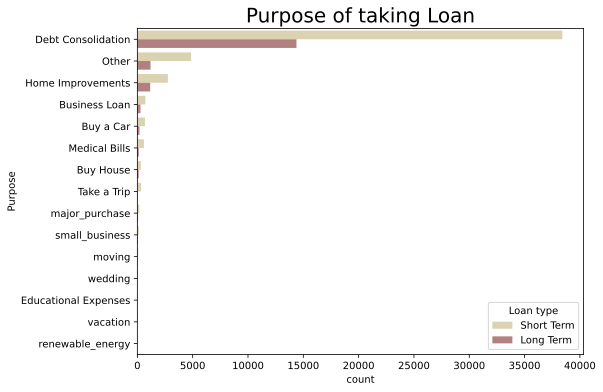

In [ ]:

plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=df1, order = df1['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

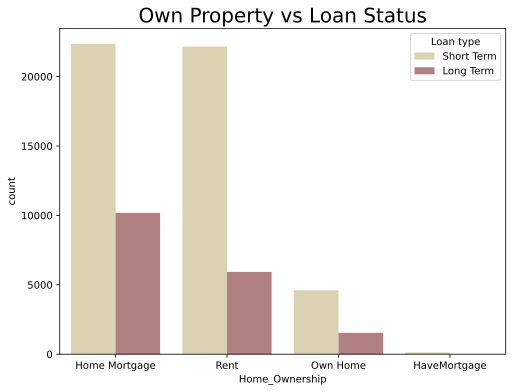

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Home_Ownership',data=df1 ,order = df1['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

NameError: name 'bank_lone_train' is not defined

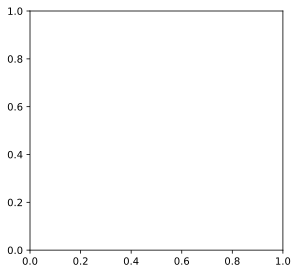

In [ ]:


plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train[bank_lone_train['Current_Loan_Amount'] != 99999999]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );



In [ ]:
bank_lone_test = bank_lone_test[bank_lone_test['Current_Loan_Amount'] != 99999999]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

NameError: name 'bank_lone_test' is not defined

NameError: name 'bank_lone_train' is not defined

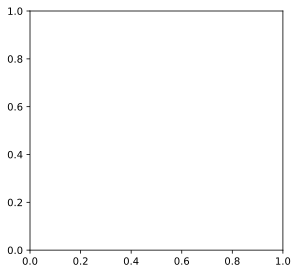

In [ ]:
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] <= 1500,:]
bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] >= 620 ,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Credit_Score'] >= 680 )
                                   & (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );



In [ ]:
print("le Dataset prêt banquaire {rows} rows.".format(rows = len(df1)))

le Dataset prêt banquaire 100514 rows.


In [ ]:
df1


,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
os.getcwd() and df1

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Years_in_current_job'], palette='pink_r');



NameError: name 'plt' is not defined